# Page Views Time Series Visualizer

### For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

#### Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
%matplotlib inline

#### Read the .csv file and observe the dataframe

In [19]:
d = pd.read_csv("fccpage.csv")
d.info() 
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


#### Set the index to the "date" column.

In [20]:
d.set_index('date', inplace = True,drop = True)
d.index = [pd.Timestamp(i) for i in d.index]
d

,value
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144


#### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [21]:
d['value'].quantile(0.975), d['value'].quantile(0.025)

(177613.075, 17876.4)

In [22]:
d = d[(d['value']>=d['value'].quantile(0.025)) & (d['value']<=d['value'].quantile(0.975))]
d.head()

,value
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [23]:
d['value'].max(), d['value'].min()

(177588, 18060)

#### Use Matplotlib to draw a line chart similar to "Date_Plot.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

Text(0, 0.5, 'Page Views')

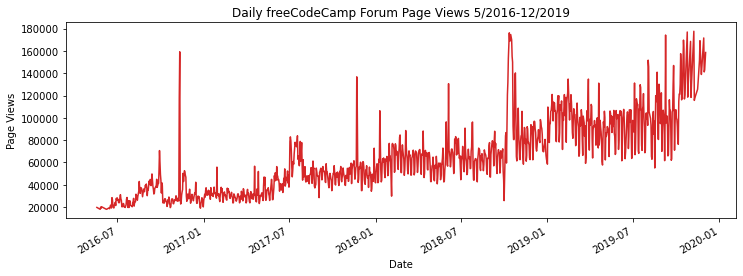

In [24]:
d.plot(figsize = (12,4), color = 'tab:red', legend = False, title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

#### Use Searborn to draw two adjacent box plots similar to "Box_Plot.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [25]:
d1 = d.copy()

In [26]:
d1['month'] = d.index.strftime('%b')

In [27]:
d1['year'] = d.index.strftime('%Y')

In [28]:
d1['num_month'] = d.index.strftime('%m')

In [29]:
d1.reset_index(drop = True, inplace = True)

In [30]:
d1.sort_values(by = 'num_month')

,value,month,year,num_month
210,37353,Jan,2017,01
937,94108,Jan,2019,01
936,77897,Jan,2019,01
935,94514,Jan,2019,01
934,100710,Jan,2019,01
...,...,...,...,...
567,72819,Dec,2017,12
566,51018,Dec,2017,12
565,43075,Dec,2017,12
201,28424,Dec,2016,12


<AxesSubplot:xlabel='month', ylabel='value'>

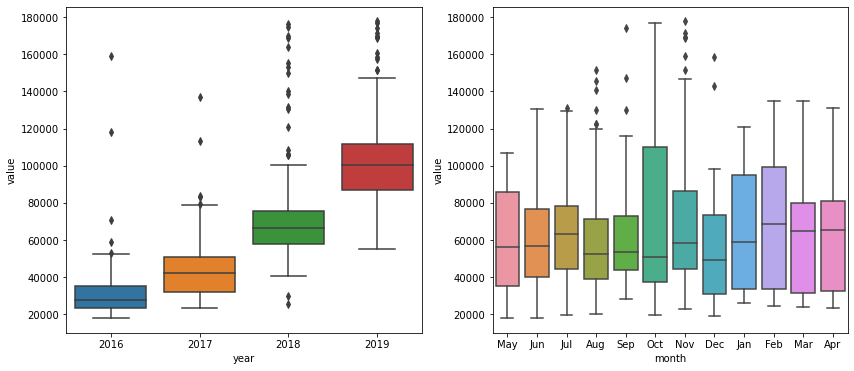

<Figure size 1152x288 with 0 Axes>

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(14.0)
fig.set_figheight(6.0)
plt.figure(figsize = (16,4))
sns.boxplot(x = 'year', y = 'value', data = d1, ax=ax1)
sns.boxplot(x= 'month', y= 'value', data = d1, ax=ax2)



#### Create a bar chart similar to "Avg_Page_Views.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [33]:
df_bar = d.copy()
leglab = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
labels = [2016, 2017, 2018, 2019]
months = np.zeros([12, 4])
months

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [34]:
for i in range(12):
    for j, year in enumerate(labels):
        t = d[d.index.year == year]
        months[i][j] = t[t.index.month == i].value.mean()
months

array([[            nan,             nan,             nan,
                    nan],
       [            nan,  32785.16129032,  58580.09677419,
        102056.51612903],
       [            nan,  31113.07142857,  65679.        ,
        105968.35714286],
       [            nan,  29369.09677419,  62693.77419355,
         91214.48387097],
       [            nan,  30878.73333333,  62350.83333333,
         89368.43333333],
       [ 19432.4       ,  34244.29032258,  56562.87096774,
         91439.90322581],
       [ 21875.10526316,  43577.5       ,  70117.        ,
         90435.64285714],
       [ 24109.67857143,  65806.83870968,  63591.06451613,
         97236.56666667],
       [ 31049.19354839,  47712.4516129 ,  62831.61290323,
        102717.31034483],
       [ 41476.86666667,  47376.8       ,  65941.73333333,
         97268.83333333],
       [ 27398.32258065,  47438.70967742, 111378.14285714,
        122802.27272727],
       [ 40448.63333333,  57701.56666667,  78688.33333333,
      

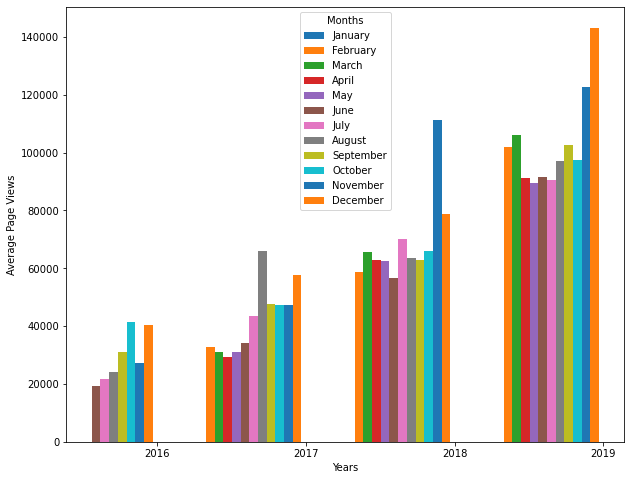

In [35]:
x = np.arange(len(labels))
width = 0.7
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
for i, month in enumerate(months):
    ax.bar(x - (width * (12 - i) / 12), months[i], width / 12, label=leglab[i])

ax.set_ylabel("Average Page Views")
ax.set_xlabel("Years")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Months')
